### Alejo Vinluan (abv210001)
# Text Classification

This notebook focuses on finding out whether a news article is real or fake given the title, text, and subject of the article. It will utilize sklearn by using Naive Bayes, Logistic Regression, and Neural Networks to predict whether or not the articles are real or fake.

## Dataset Breakdown
The dataset gives the following columns:

* title - The title of the article

* text - The contents of the article

* subject - What the news article covers (news, politics, etc.)

* date - The date the article was posted

* real - Boolean value stating whether article is real or fake


The columns title, text, and subject will be used in order to analyze the dataset with sklearn. The original dataset is over 40,000 rows so only 10,000 of the rows will be randomly selected in order to save on processing power.

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/Combined.csv')
# Source: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

# Ignore the 'date' column
data = data.drop(columns=['date', 'title', 'subject'])

# Sample only 10,000 rows of the dataset
data = data.sample(n=10000, random_state=123)

# Drop rows if missing values exist
data = data.dropna()

# Split data into 80% train and 20% test
train, test = train_test_split(data, test_size=0.2, random_state=123)

## Distribution of Real Articles vs Fake
The following pie chart shows the distribution of the dataset of real articles and fake articles.

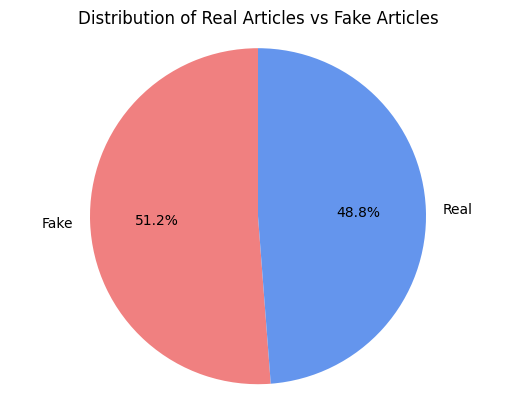

In [3]:
# Get how many values in 'real' column are 0 or 1
values = data['real'].value_counts()

# Create the pie chart
import matplotlib.pyplot as plt

labels = ['Fake', 'Real']
sizes = [values[0], values[1]]
colors = ['lightcoral', 'cornflowerblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Real Articles vs Fake Articles')
plt.show()


The pie chart shows that 48.8% of our dataset are real articles while 51.2% of the articles are fake.

## SKLearn

SKLearn (Scikit-learn) is an open source library in Python used for data analysis and machine learning. It has the capability of performing the classification algorithms that will be used in this notebook: Naive Bayes, Logistic Regression, and Neural Networks.

## Pre-Process Text

The text needs to be pre-processed in order to utilize the classification algorithms. In this instance, the text will be broken down into Bag of words representations. 

SKLearn uses Bag of Words by giving each word an ID within the training set. Then, it will count the number of occurences of that specific word. Bag of Words are generally used for high-dimensional sparse dataests.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Split the train columns into real and text
text_train = train['text']
real_train = train['real']

# Split the test columns into real and text
text_test = test['text']
real_test = test['real']

# Utilize Bag of Words for each column in the train and test set
count_vect = CountVectorizer()

# Transform the training data into Bag of Words
text_train = count_vect.fit_transform(text_train)
text_test = count_vect.transform(text_test)

## Naive Bayes

Naive Bayes utilizes Bayes Theorem to make a classification. It will assume each of the columns are independent of each other.

Accuracy Score: 0.973 

Confusion Matrix:

Accuracy: 0.97
Sensitivity: 0.96
Specificity: 0.99


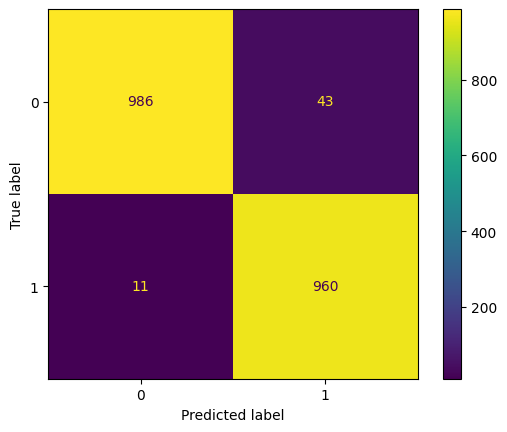

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

nb = MultinomialNB()
nb.fit(text_train, real_train)

predictions = nb.predict(text_test)

# Find accuracy of the model
accu_score = accuracy_score(real_test, predictions)
print("Accuracy Score:", accu_score, "\n")

con_matrix = confusion_matrix(real_test, predictions)
TN = con_matrix[0][0]
FP = con_matrix[0][1]
FN = con_matrix[1][0]
TP = con_matrix[1][1]

print("Confusion Matrix:")
ConfusionMatrixDisplay(con_matrix).plot()

# Calculate accuracy, sensitivity, and specificity from Confusion Matrix
acc =  (TP + TN) / (TP + TN + FP + FN)
sen = TP / (TP + FN)
spe = TN / (TN + FP)

print("\nAccuracy:", '{:.2f}'.format(acc))
print("Sensitivity:", '{:.2f}'.format(spe))
print("Specificity:",'{:.2f}'.format(sen))

When utilizing the Naive Bayes model to predict whether an article is real or fake, we find the following statistics:

* Accuracy = 97%

* Sensitivity = 96%

* Specificity = 99%

This suggests that there is a high accuracy throughout. The model is accurately predicting both True Negative outcomes and True Positive outcomes.


## Logistic Regression

Logistic regression can be used to classify whether the articles are real or fake by utilizing independent variables. It fits a logistic function on each of the variables in order to predict the outcome.

Accuracy Score: 0.995 

Confusion Matrix:

Accuracy: 0.99
Sensitivity: 0.99
Specificity: 1.00


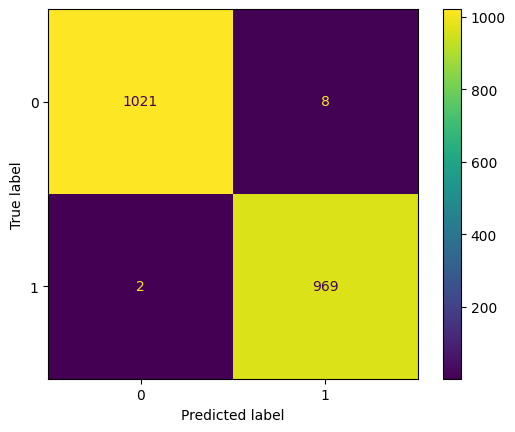

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(text_train, real_train)

predictions = lr.predict(text_test)

# Find accuracy of the model
accu_score = accuracy_score(real_test, predictions)
print("Accuracy Score:", accu_score, "\n")

con_matrix = confusion_matrix(real_test, predictions)
TN = con_matrix[0][0]
FP = con_matrix[0][1]
FN = con_matrix[1][0]
TP = con_matrix[1][1]

print("Confusion Matrix:")
ConfusionMatrixDisplay(con_matrix).plot()

# Calculate accuracy, sensitivity, and specificity from Confusion Matrix
acc =  (TP + TN) / (TP + TN + FP + FN)
sen = TP / (TP + FN)
spe = TN / (TN + FP)

print("\nAccuracy:", '{:.2f}'.format(acc))
print("Sensitivity:", '{:.2f}'.format(spe))
print("Specificity:",'{:.2f}'.format(sen))

When utilizing the Logistic Regression to predict whether an article is real or fake, we find the following statistics:

* Accuracy = 99%

* Sensitivity = 99%

* Specificity = 100%

This suggests that there is almost perfect accuracy throughout. There were only a total of 10 incorrect predictions out of 2000 seperate predictions from the testing dataset.


## Neural Networks

Neural Networks is a set of interconnected nodes that perform computations on the inputs. Neural networks will adjust weights between neurons in order to make more accurate predictions.

Accuracy Score: 0.9915 

Confusion Matrix:

Accuracy: 0.99
Sensitivity: 0.99
Specificity: 1.00


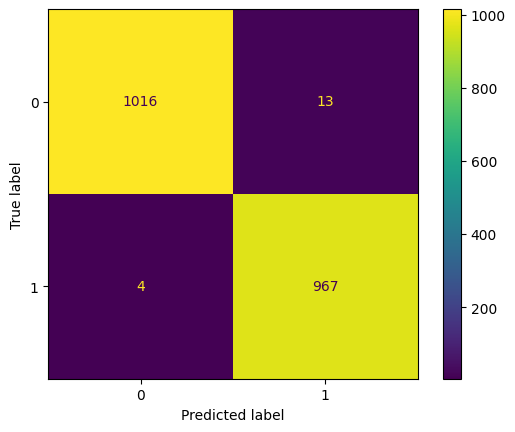

In [36]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(text_train, real_train)

predictions = mlp.predict(text_test)

# Find accuracy of the model
accu_score = accuracy_score(real_test, predictions)
print("Accuracy Score:", accu_score, "\n")

con_matrix = confusion_matrix(real_test, predictions)
TN = con_matrix[0][0]
FP = con_matrix[0][1]
FN = con_matrix[1][0]
TP = con_matrix[1][1]

print("Confusion Matrix:")
ConfusionMatrixDisplay(con_matrix).plot()

# Calculate accuracy, sensitivity, and specificity from Confusion Matrix
acc =  (TP + TN) / (TP + TN + FP + FN)
sen = TP / (TP + FN)
spe = TN / (TN + FP)

print("\nAccuracy:", '{:.2f}'.format(acc))
print("Sensitivity:", '{:.2f}'.format(spe))
print("Specificity:",'{:.2f}'.format(sen))

When utilizing Nueral Networks, it produced a similar result as Logistic Regression:

* Accuracy = 99%

* Sensitivity = 99%

* Specificity = 100%

There were only a total of 17 incorrect predictions out of 2000 rows from the test frame, which is only a difference of 7 from the Logistic Regression.

## Comparisons
According to the statistics above, Logistic Regression and Neural Networks produced the most accurate predictions, with each having an accuracy of about 99%. The specificity of each were dangerously close to 100%, which means True Negatives were accurately predicted a majority of the time. There was only a 7 row difference in accuracy between both models, which is miniscule in terms of a 2000-row dataset. 

Naive Bayes classification gave accurate predictions 97% of the time. Although that is not as high of an accuracy as the other 2 models, 97% is still incredibly accurate and great for making prediction models. The sensitivity was 96% which means the model accurately predicted True Positives 96% of the time. Similar to the Logistic Regression and Neural Network models, the specificity of the models was at 99% which means Naive Bayes was able to predict True Negatives at a 99% rate.

I would like to compare and contrast these models in the future by utilizing all of the columns from the dataset including the article's title, subject, and date. Furthermore, the entire dataset is over 44,000 rows, so performing Machine Learning models on the entire dataset would've been too intensive on my home computer.